# Ejemplo 01
***Dr. Antonio Arista Jalife***

En esta sesión aprenderemos acerca de procesamiento digital de imágenes, para servir como base y preámbulo para Deep Learning. Una de las ramas mas prometedoras de Machine Learning y que nació hace apenas unos años. Para ello, tener bases y fundamentos de procesamiento de imágenes nos será muy útil. 

Primero, importaremos la librería de visión computacional cv2 de OpenCV. Si al importarla python no la encuentra, es probable que no esté instalada, para ello instalala con "pip3 install opencv-python"

In [1]:
import cv2 #descomprime imágenes
import numpy as np
from matplotlib import pyplot as plt

### Carga de imágenes.
La librería cv2 se encarga de descomprimir imágenes para mostrarlas en un arreglo de NumPy, cuando cargamos una imagen primero usamos la función cv2.imread("ruta de la imagen", espacio de color)

Luego requerimos acomodar la imagen para que los canales estén adecuadamente acomodados con cvtColor (por ahora toma esto como dogma de fé, lo explicaré en unas celdas mas adelante)

In [2]:
imageOpenCV = cv2.imread("mexicocity.jpg", cv2.IMREAD_COLOR)
imagen = cv2.cvtColor(imageOpenCV, cv2.COLOR_BGR2RGB) #De bluegreenread a Reedgreenblue

### Despliegue de imágenes en Jupyter Notebook.
Como podemos ver con la función type, la imagen está guardada en un volumen de numpy.

OpenCV tiene su propio visor de imágenes, pero es muy común que te llenes de pantallas, ya que cada imagen se despliega en una ventana diferente. Para evitar eso, utilizaremos MatPlotLib, que tiene sus funciones de muestra imágenes. Para ello, usamos plt.imshow(imagen)

<class 'numpy.ndarray'>
Tamaño de la imagen: (alto, ancho, canales)
(460, 920, 3)


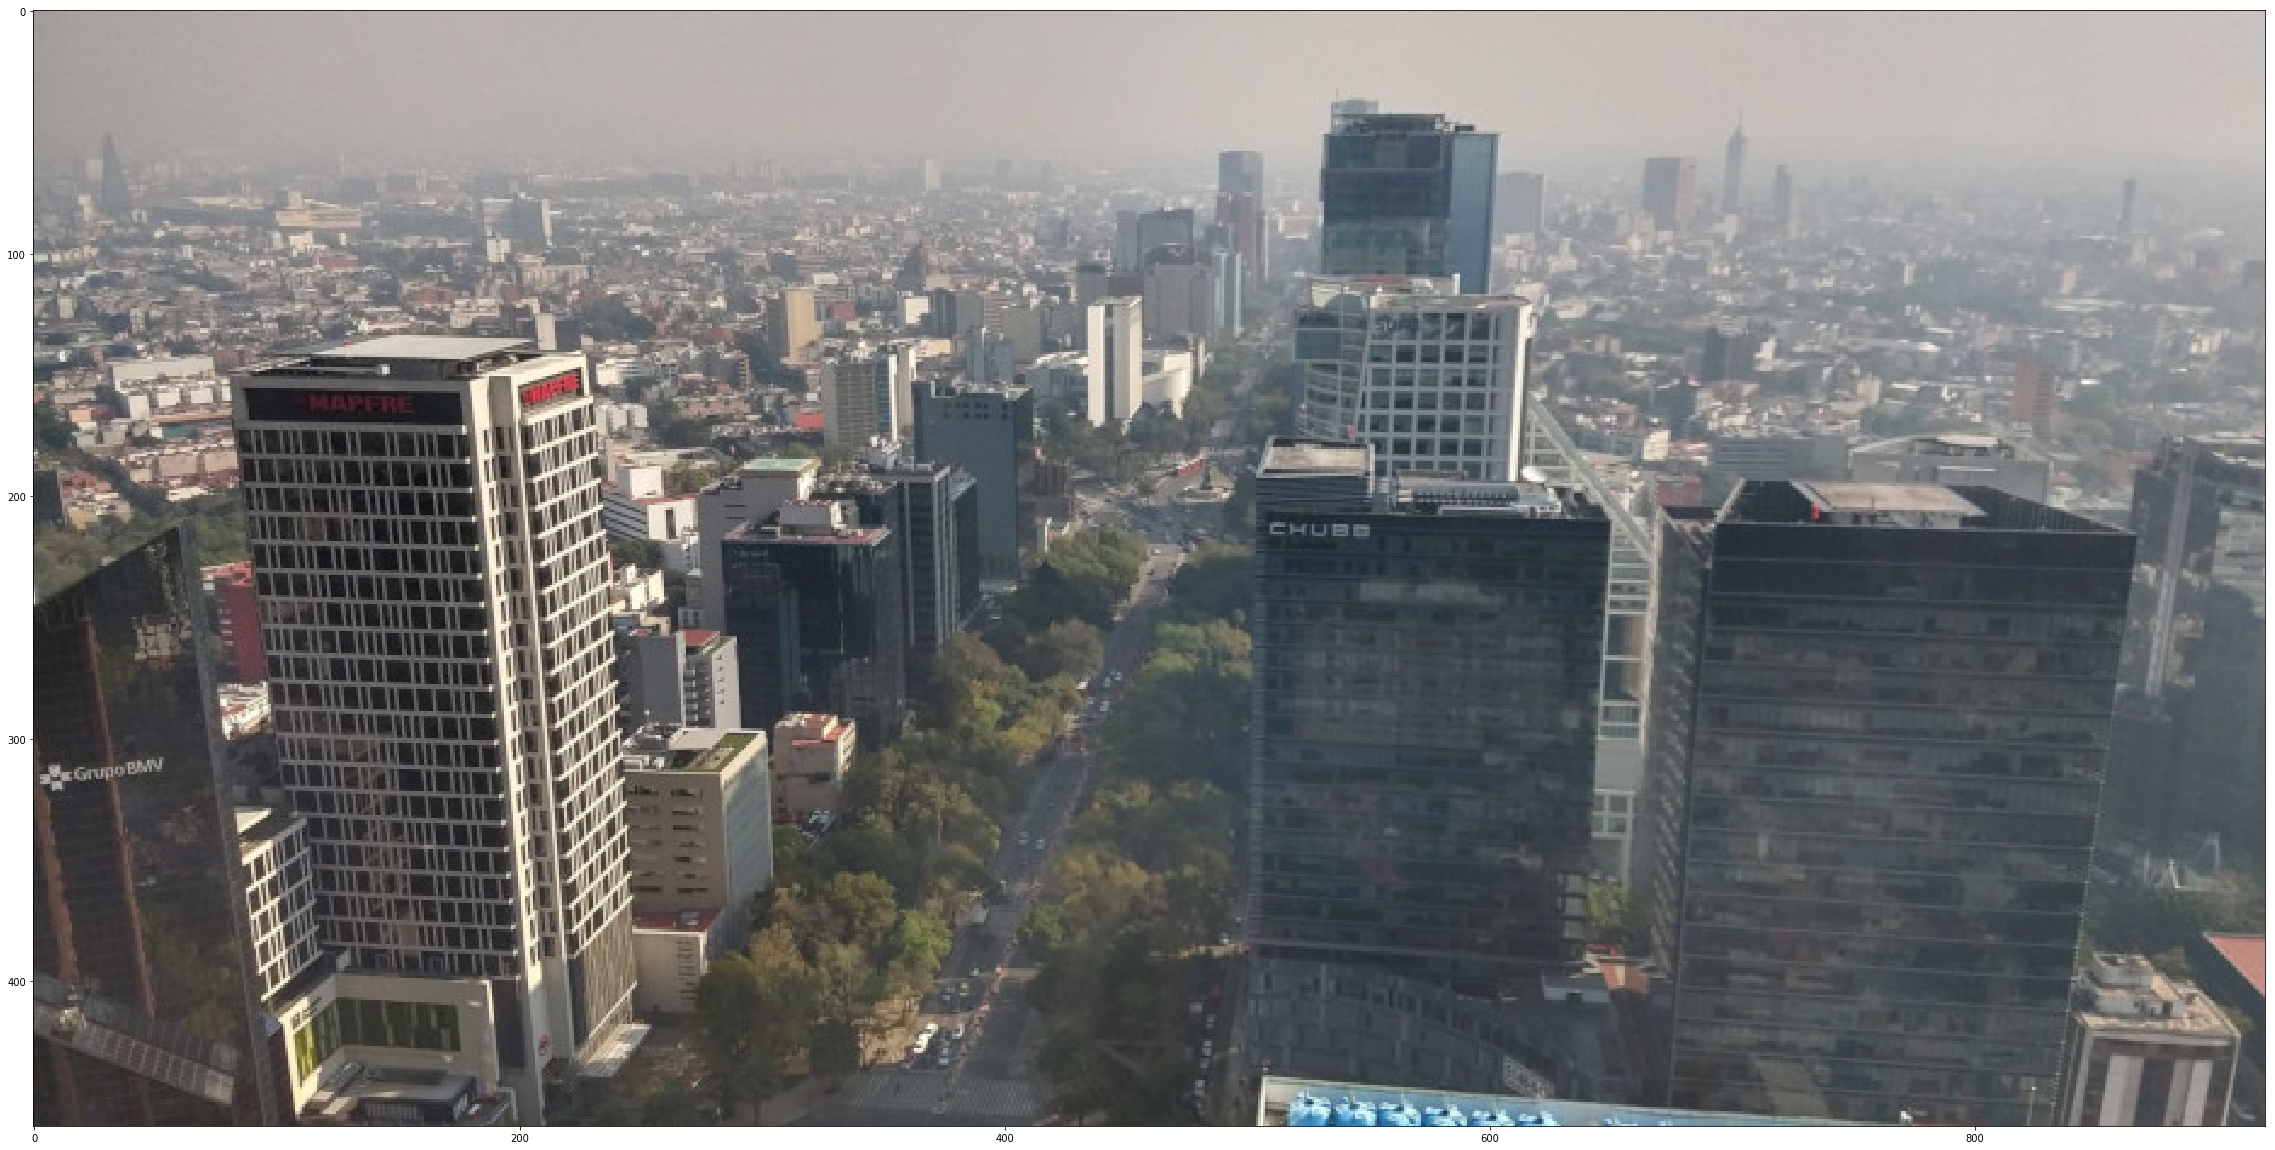

In [3]:
print(type(imagen))
print("Tamaño de la imagen: (alto, ancho, canales)")
print(imagen.shape)
plt.figure(figsize=(40,40))
plt.imshow(imagen)

### Canales de color.
Una imagen está compuesta por tres canales: Rojo (R), Verde (G), y Azul (B). Cuando combinas los tres canales, puedes obtener una imagen perfecta, por ello, una imagen a color es un cubo de tamaño (alto x ancho x canales).

Existen otros espacios de color, como el CMYK, pero en estos ejemplos no tiene mucho caso enfocarnos en ello. CMYK se usa en impresiones y permite obtener colores por substracción. En el prework hay mas información de los espacios de color.

Primero, observemos la imagen en solamente el canal rojo:

(460, 920)
(460, 920, 3)


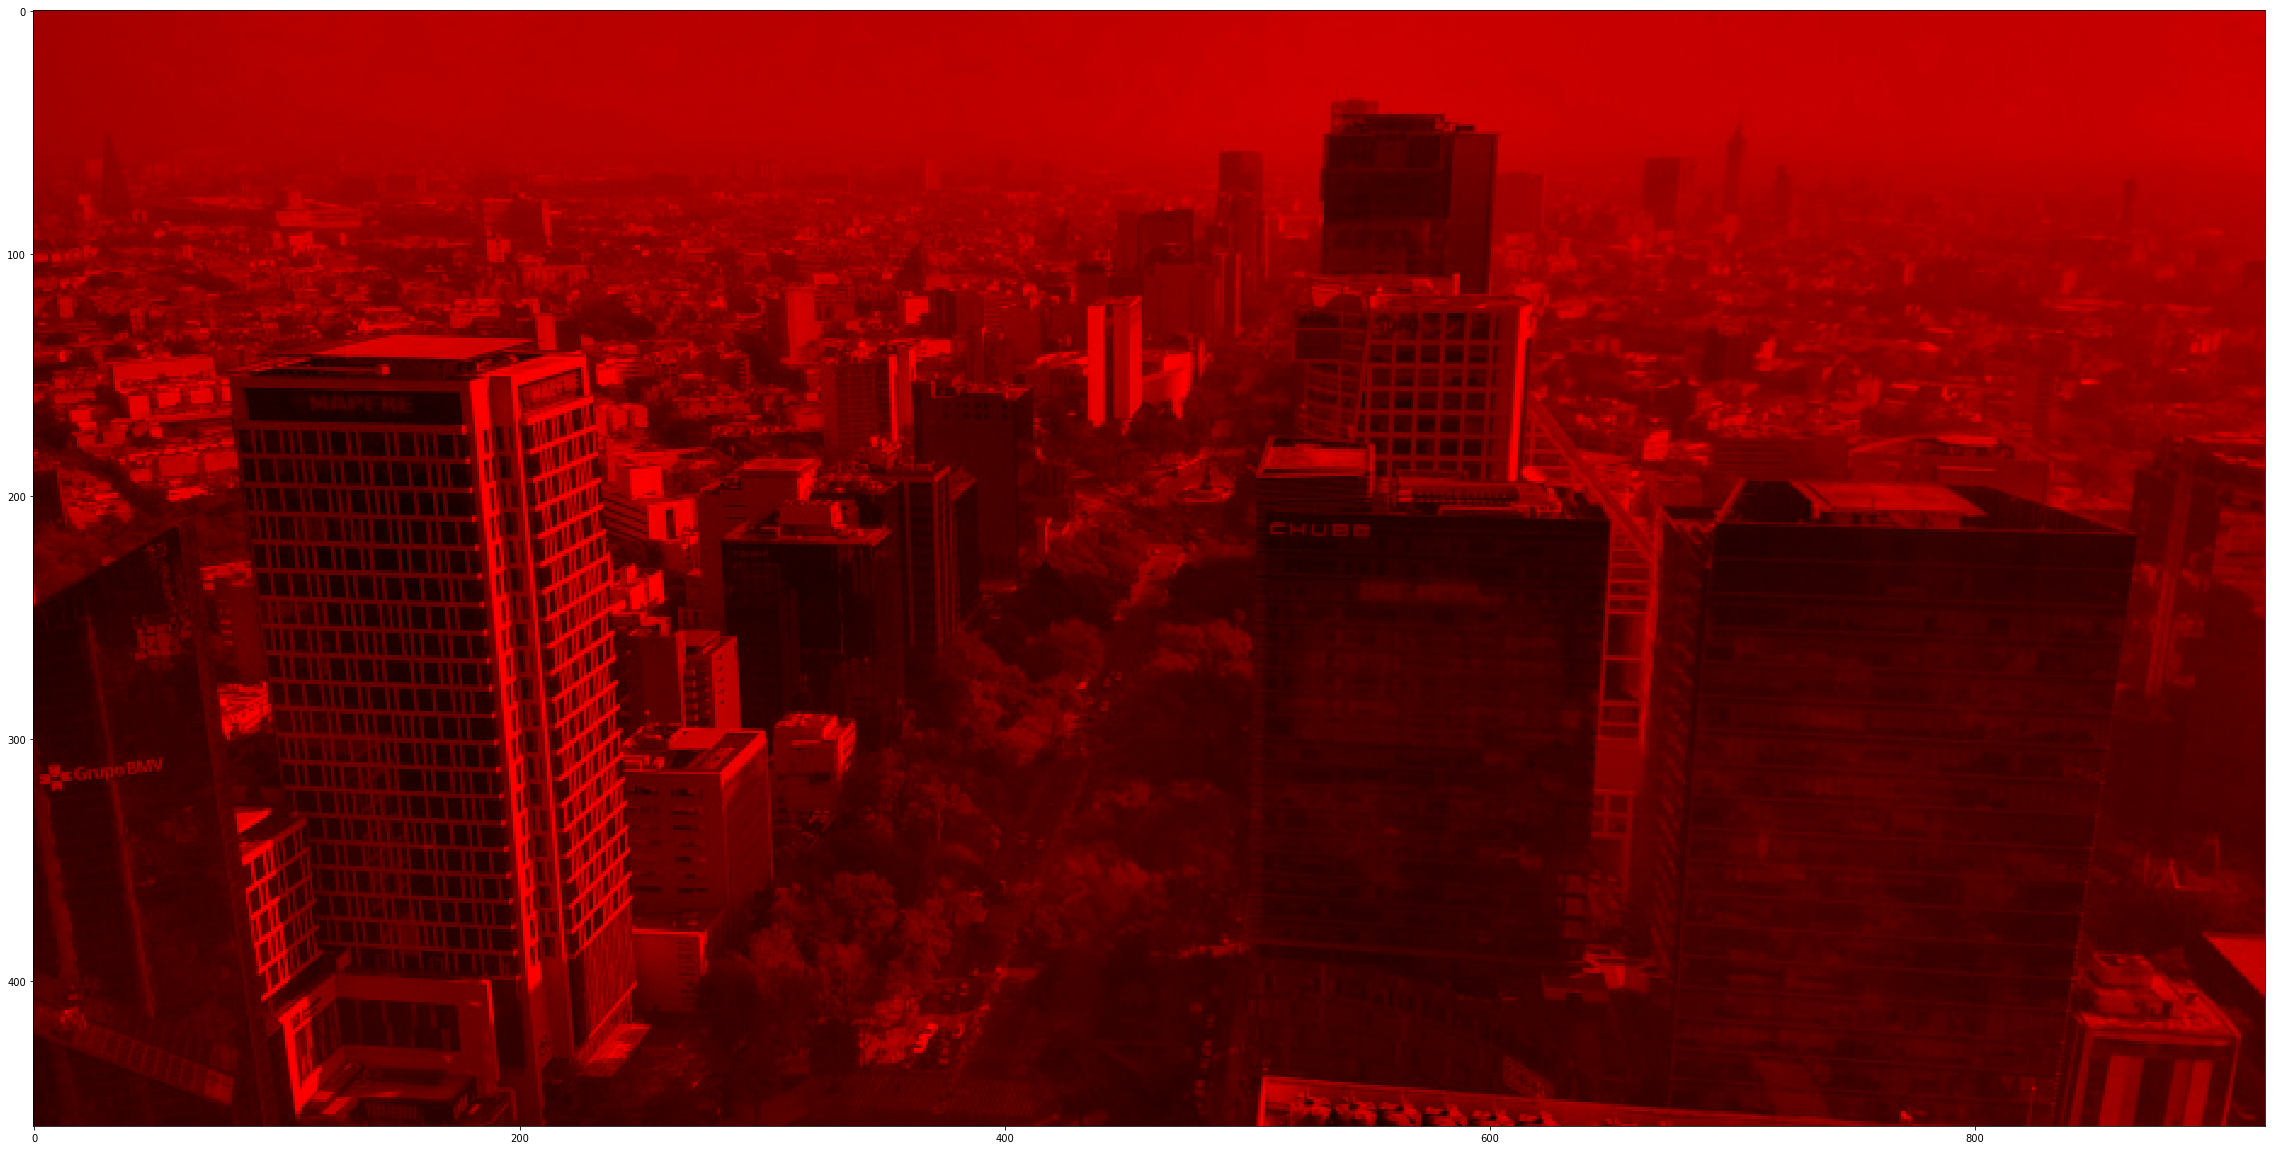

In [9]:
canal_rojo = imagen[:,:,0]
print(canal_rojo.shape)

#Volveremos los canales que ignoramos a 0.
dummy_channel = np.zeros_like(canal_rojo)
img_canal_rojo = np.dstack((canal_rojo, dummy_channel, dummy_channel))

print(img_canal_rojo.shape)
plt.figure(figsize=(40,40))
plt.imshow(img_canal_rojo)

Ahora mostramos el canal verde, el segundo canal. Notarás que el canal verde puedes observar mejores detalles que el canal rojo o azul. ¿Porque?

La razón no está en la imagen, sino en nuestra vista: Hemos evolucionado para reconocer objetos que están justo enmedio del espectro de color visible: Los objetos verdes son mas sencillos de observar para los humanos. 

(460, 920)
(460, 920, 3)


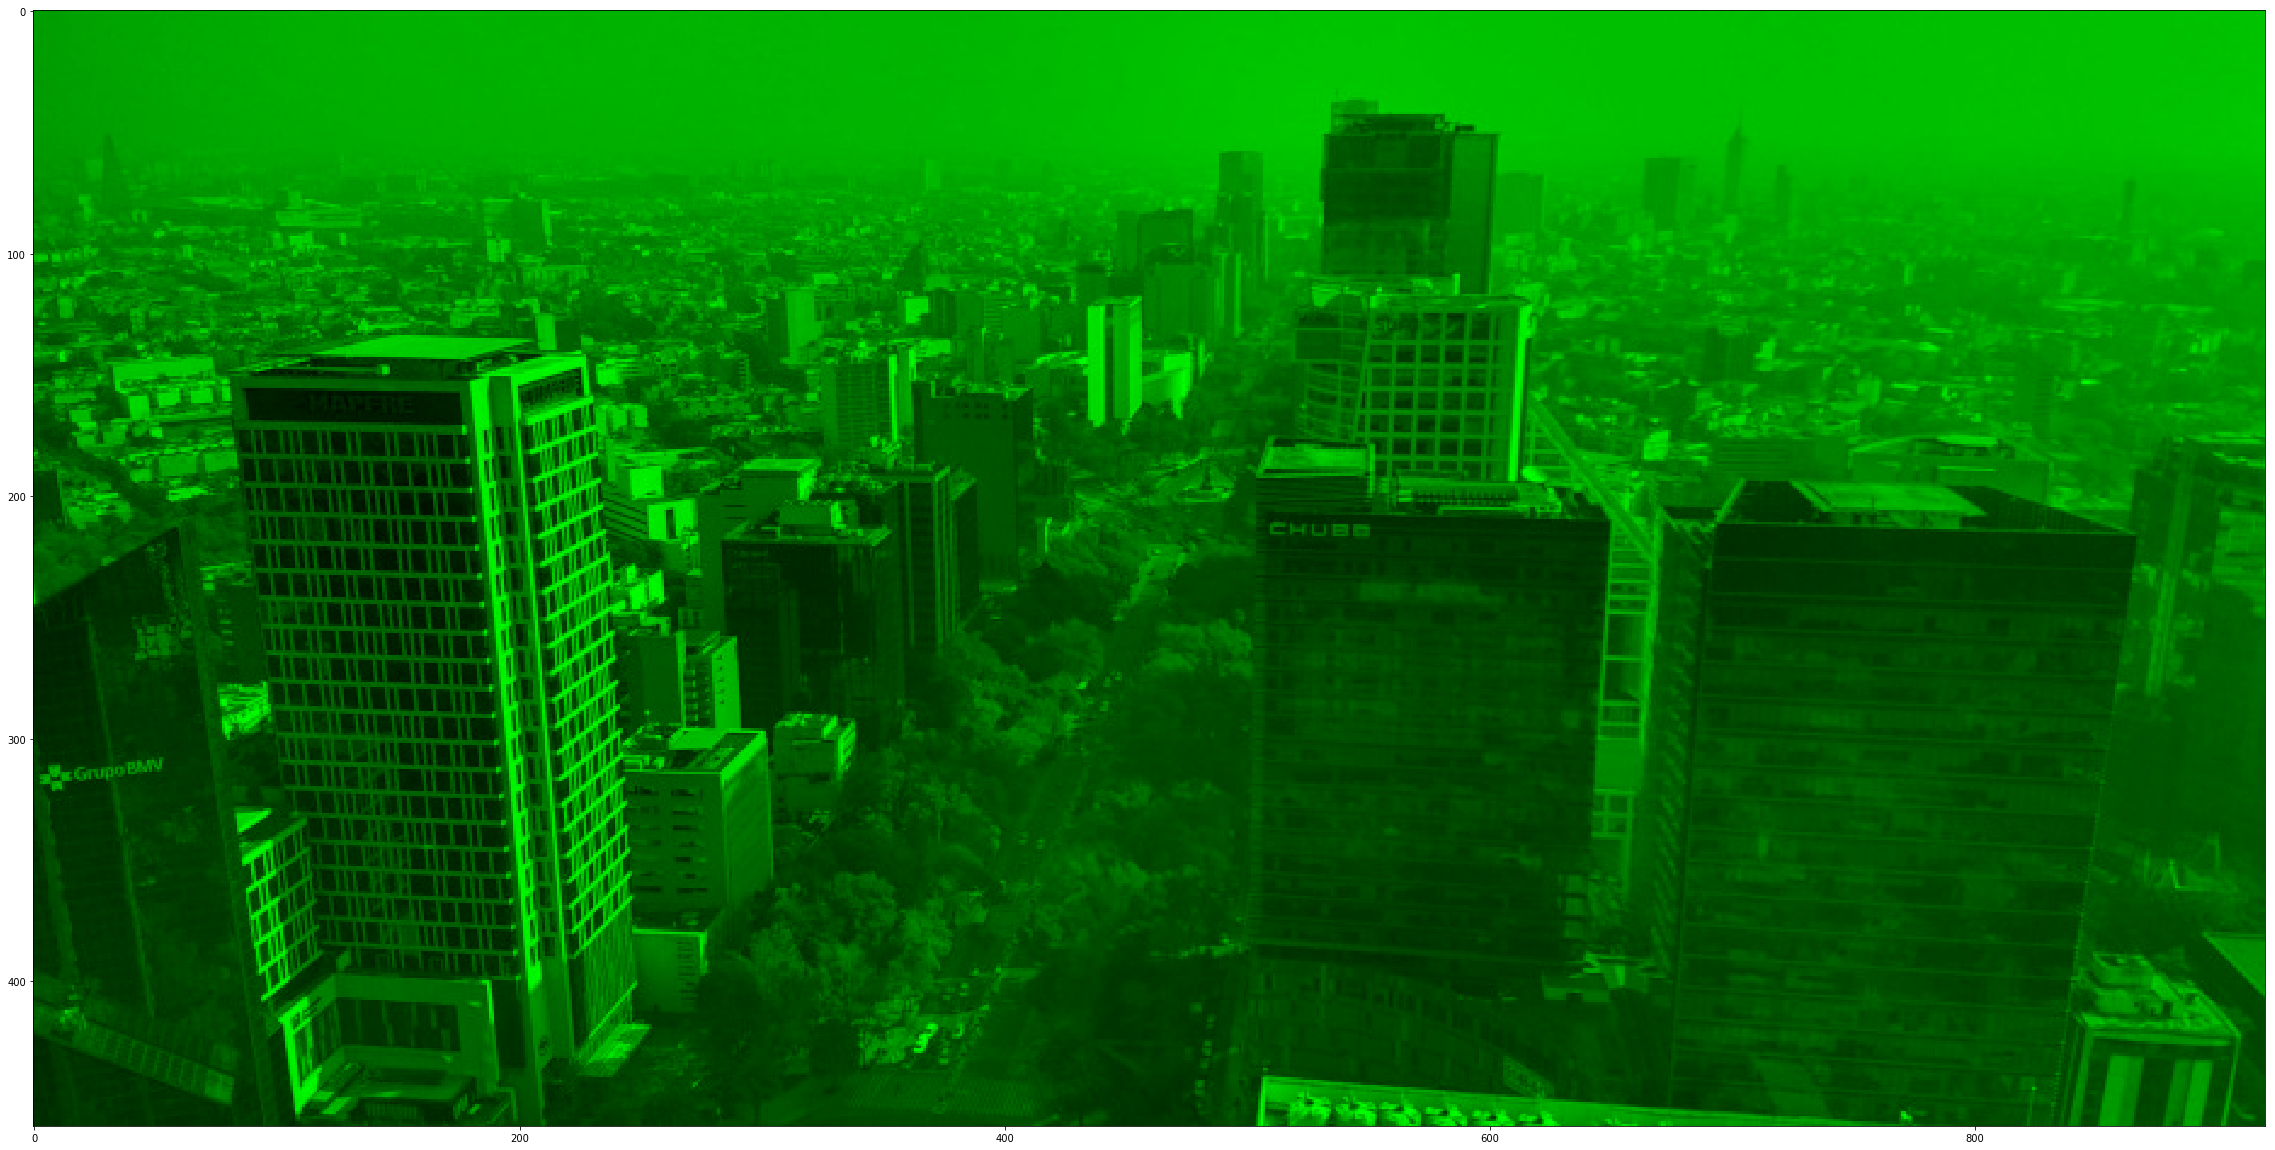

In [10]:
canal_verde = imagen[:,:,1]
print(canal_verde.shape)

dummy_channel = np.zeros_like(canal_verde)
img_canal_verde = np.dstack((dummy_channel, canal_verde, dummy_channel))

print(img_canal_verde.shape)
plt.figure(figsize=(40,40))
plt.imshow(img_canal_verde)

Ahora mostramos la imagen del canal azul. 

(460, 920)
(460, 920, 3)


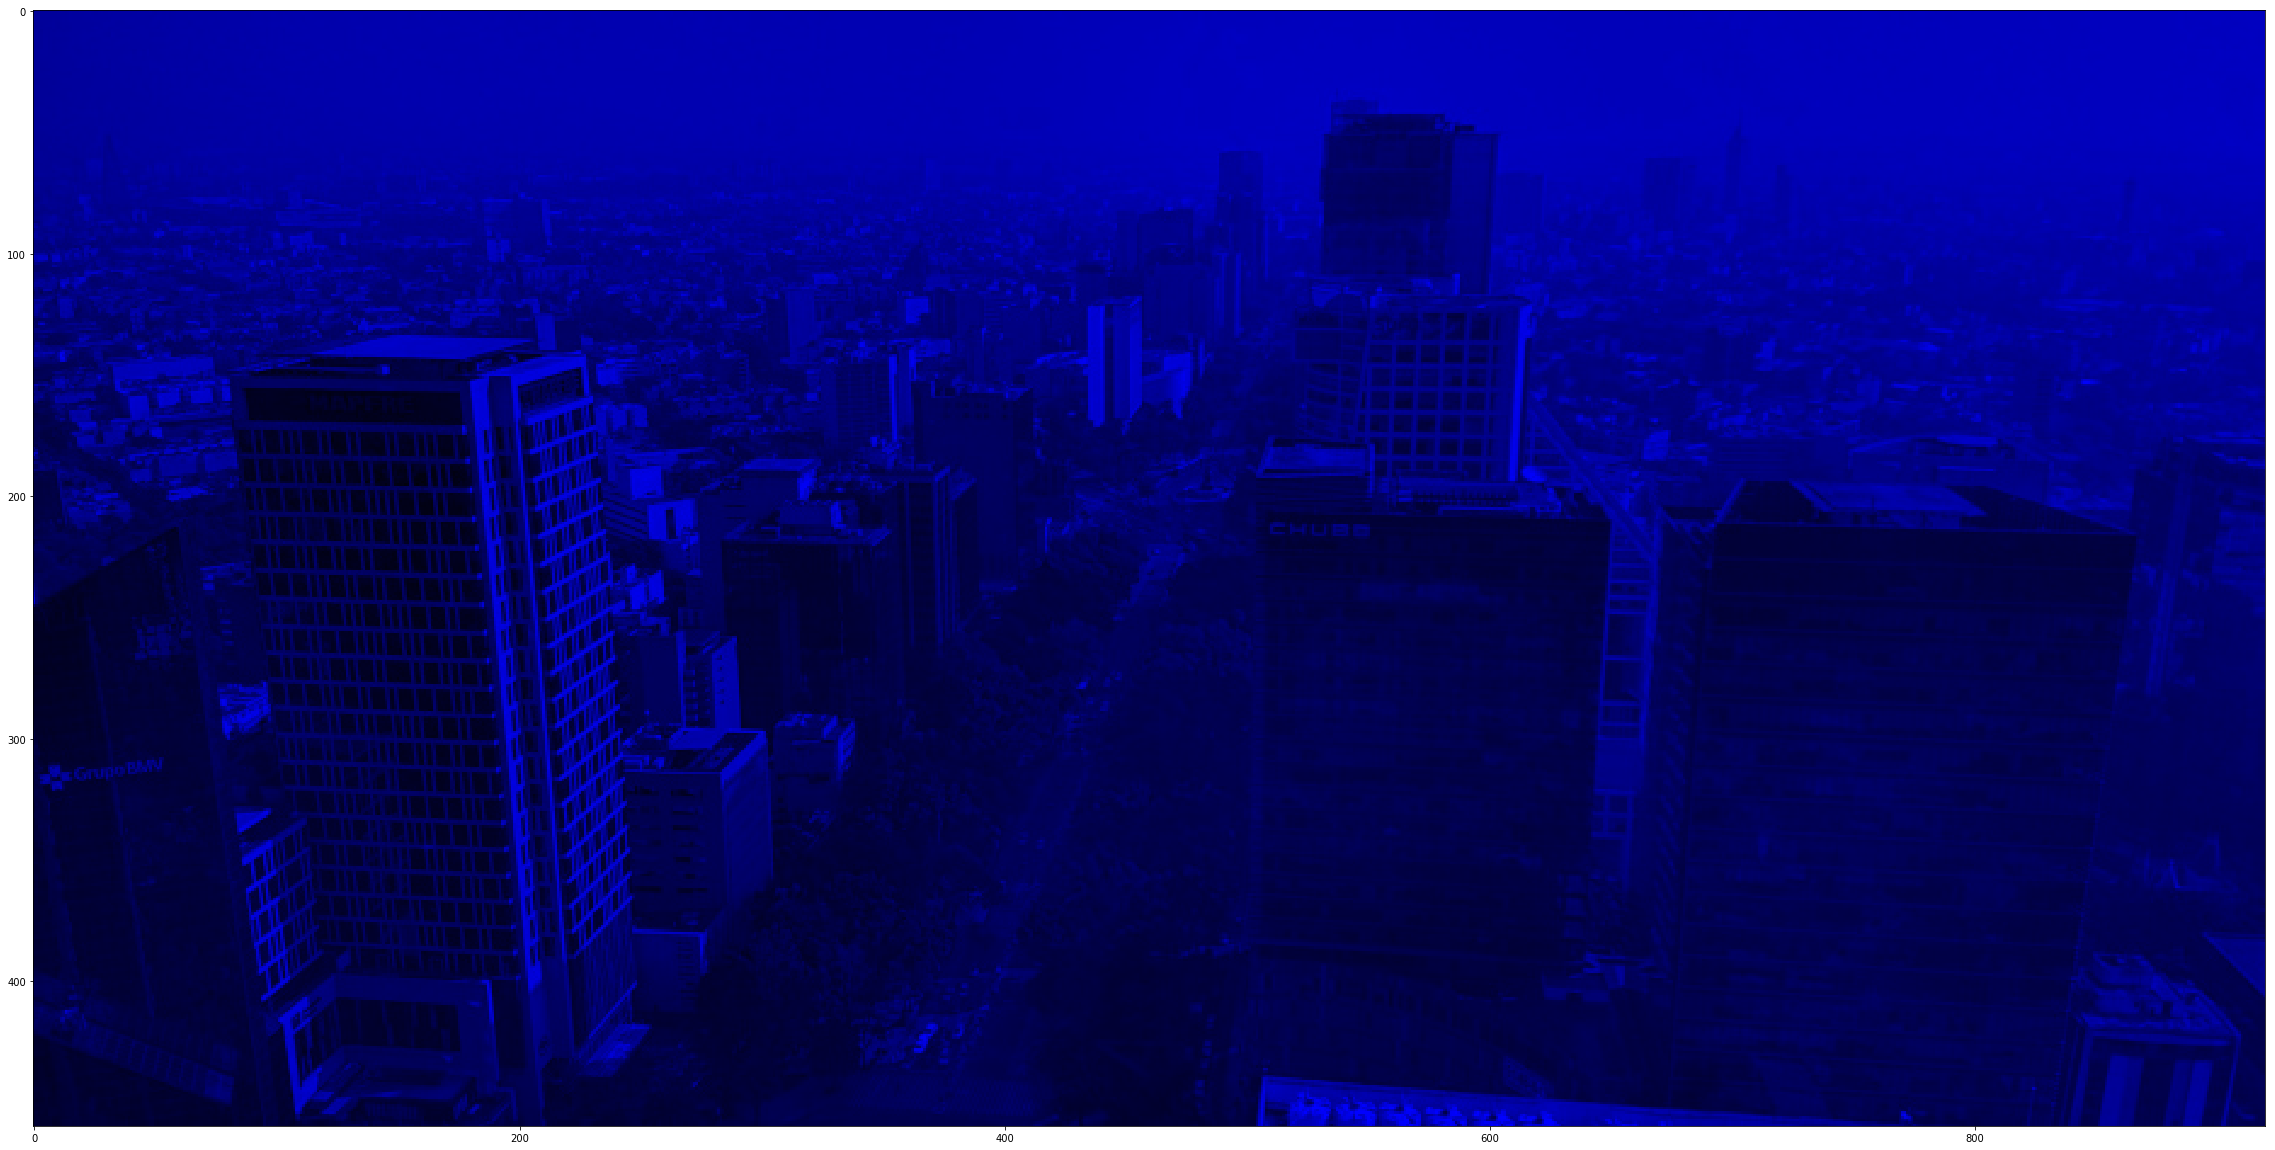

In [6]:
canal_azul = imagen[:,:,2]
print(canal_azul.shape)

dummy_channel = np.ones_like(canal_azul)
img_canal_azul = np.dstack((dummy_channel, dummy_channel,canal_azul))

print(img_canal_azul.shape)
plt.figure(figsize=(40,40))
plt.imshow(img_canal_azul)

Si colocamos la imagen del canal rojo, verde, y azul en el stack y la mostramos, podemos obtener la imagen reconstruida, con la finalidad de probar que al combinar los tres canales de color puedes obtener cualquier color.

(460, 920, 3)


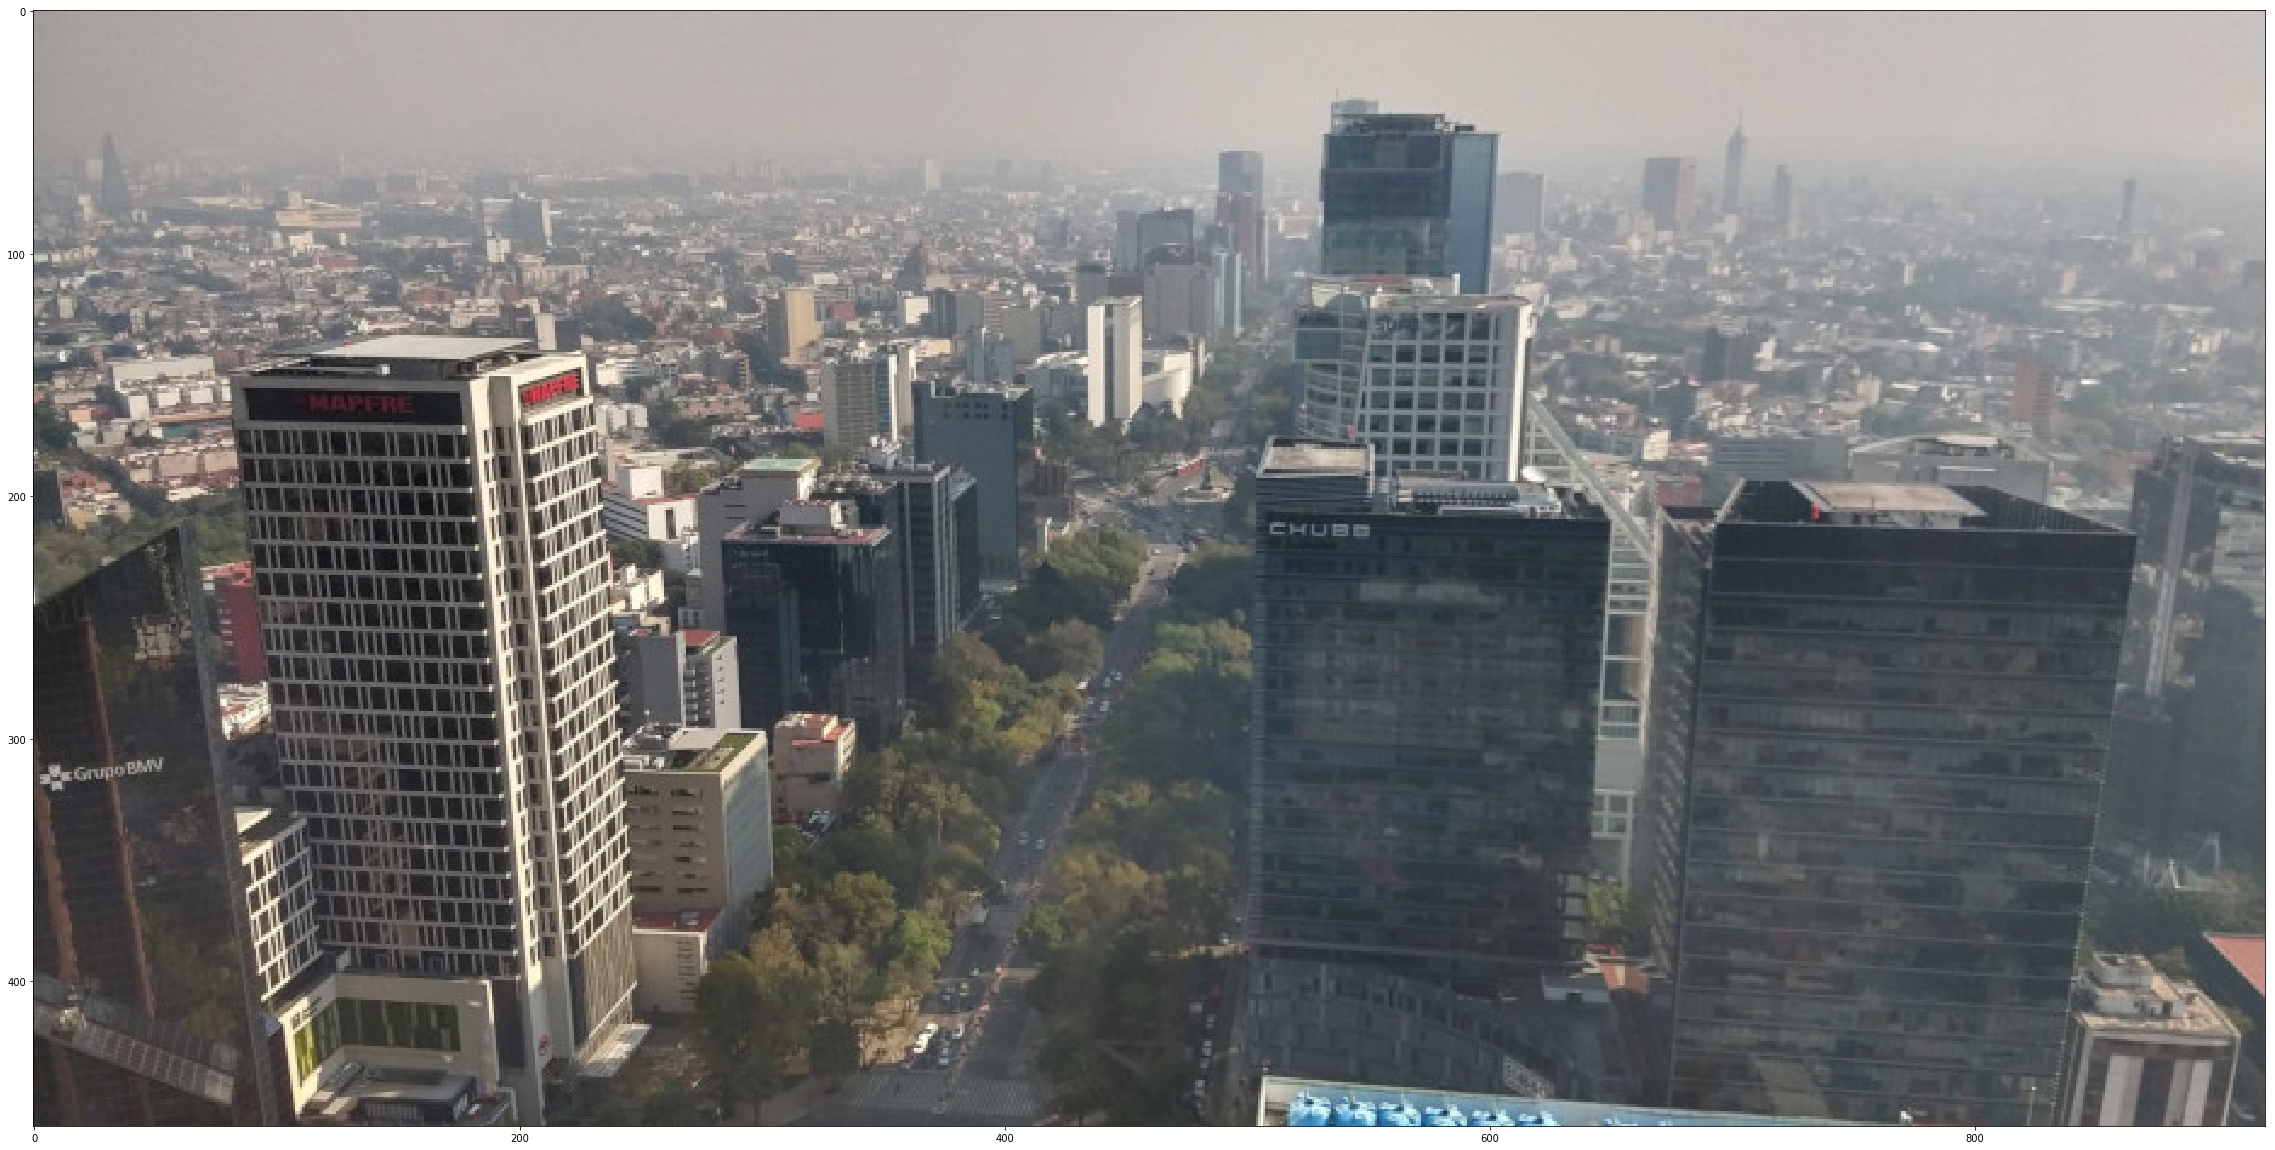

In [7]:
imagen_reconstruida = np.dstack((canal_rojo, canal_verde, canal_azul))

print(imagen_reconstruida.shape)
plt.figure(figsize=(40,40))
plt.imshow(imagen_reconstruida)

### Escala de grises
Hay muchos métodos para obtener una imagen en escala de grises. Algunos utilizan proporciones para darle mas peso al canal verde que a otros colores, otros mas solamente toman un canal (lo cual creo yo que está mal porque pierdes información de otros canales...), y otros mas utilizan un promedio de los tres canales para generar una imagen en escala de grises, la cual representa una imagen plana de un solo canal. 

Nosotros generaremos las imágenes en escala de grises por medio del promedio de los tres canales:

(460, 920)


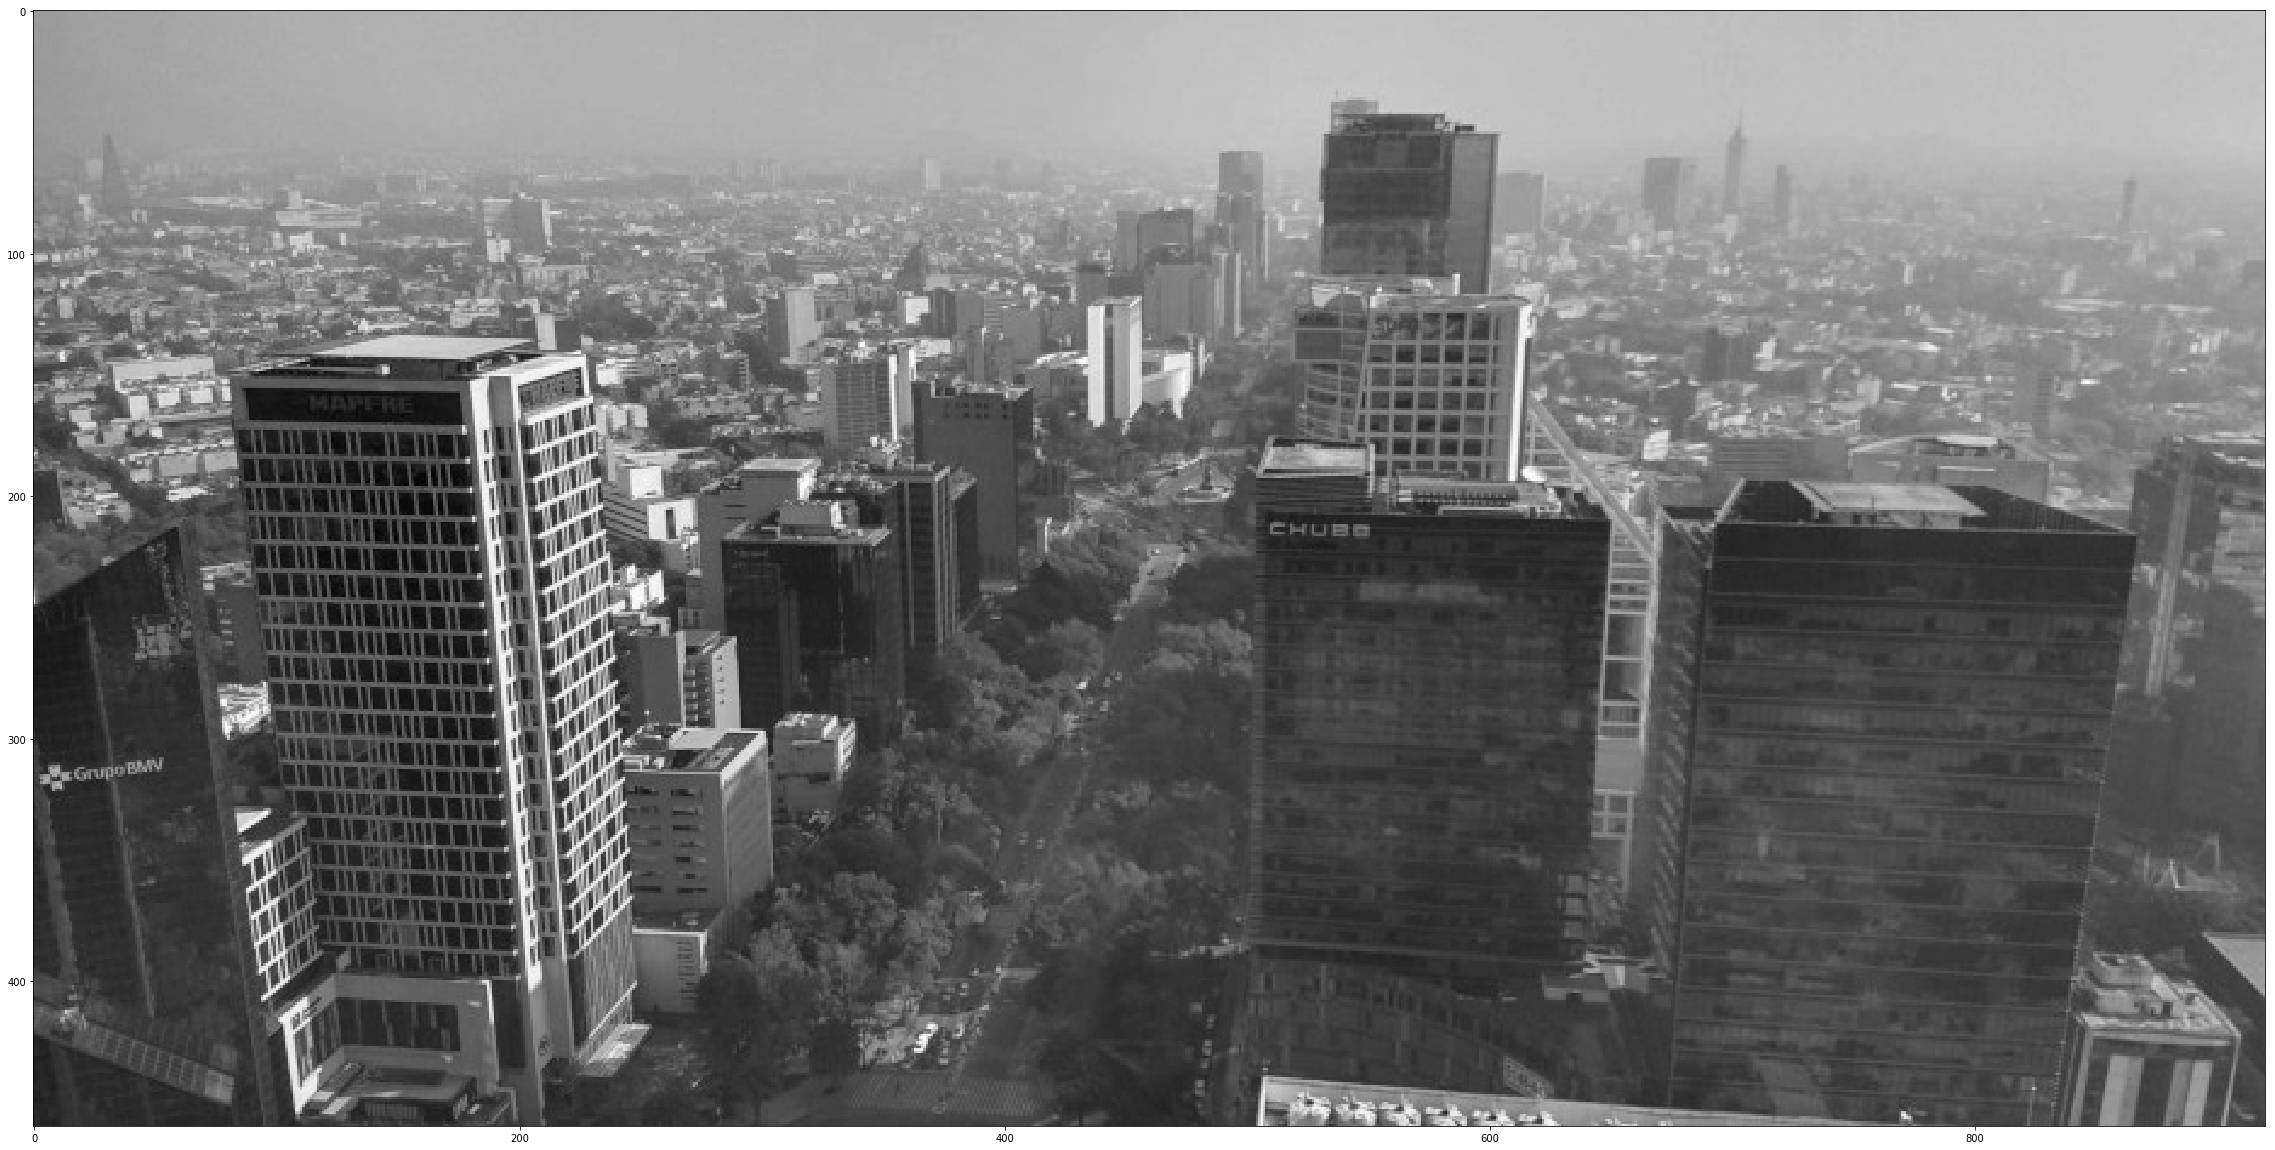

In [8]:
imagen_grayscale = np.sum(imagen,axis = 2)
imagen_grayscale = imagen_grayscale / 3
print(imagen_grayscale.shape)
plt.figure(figsize=(40,40))
plt.imshow(imagen_grayscale,cmap=plt.cm.gray)